# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [461]:
hp = pd.read_csv('/Users/gracesaunders/Documents/GitHub/linearModels/lab/data/pierce_county_house_sales.csv')
hp.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [462]:
var = 'sale_date'
hp[var].describe()


count          16814
unique           362
top       2020-07-28
freq             109
Name: sale_date, dtype: object

In [463]:
hp[var] = pd.to_datetime(hp[var])
hp[var].describe()

count                            16814
mean     2020-07-16 13:34:32.986796544
min                2020-01-01 00:00:00
25%                2020-04-27 00:00:00
50%                2020-07-27 00:00:00
75%                2020-10-09 00:00:00
max                2020-12-31 00:00:00
Name: sale_date, dtype: object

<Axes: xlabel='sale_date', ylabel='sale_price'>

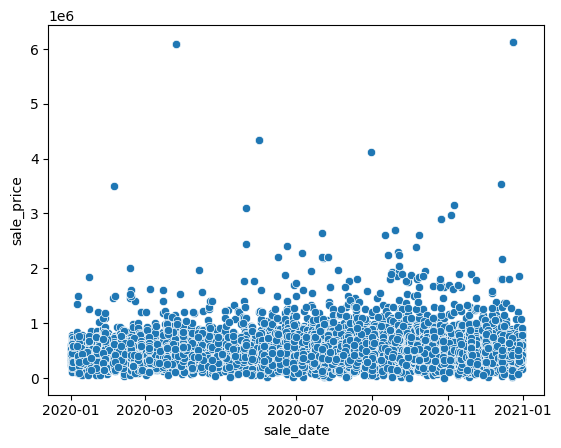

In [464]:
# once converted to datetime, .describe() shows the min and max dates - all within the same year, so probably not an issue
# but also not a great variable to use for prediction
# curious about the distribution of sale prices by time of year though so let's plot that
sns.scatterplot(data=hp, x='sale_date', y='sale_price')
# no noticeable pattern so I'm moving on

In [465]:
var = 'house_square_feet'
hp[var].describe()

count    16814.000000
mean      1879.941953
std        760.419008
min          1.000000
25%       1320.000000
50%       1774.000000
75%       2352.000000
max       9510.000000
Name: house_square_feet, dtype: float64

In [466]:
# min is 1 sq ft, which is odd
print(hp[hp[var] == 1])
# this seems like a data entry error/mistake, so dropping it
hp.drop(hp[hp[var] == 1].index, inplace=True)

      sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
1506 2020-01-27     1086000                  1                           0   

      basement_square_feet  attached_garage_square_feet  \
1506                   384                          440   

      detached_garage_square_feet  fireplaces    hvac_description  \
1506                            0           0  Electric Baseboard   

                    exterior interior  stories     roof_cover  year_built  \
1506  Masonry Concrete Block  Drywall        1  Built Up Rock        1966   

      bedrooms  bathrooms waterfront_type view_quality           utility_sewer  
1506         0          1             NaN   View Avg +  SEWER/SEPTIC INSTALLED  


<Axes: xlabel='house_square_feet', ylabel='Count'>

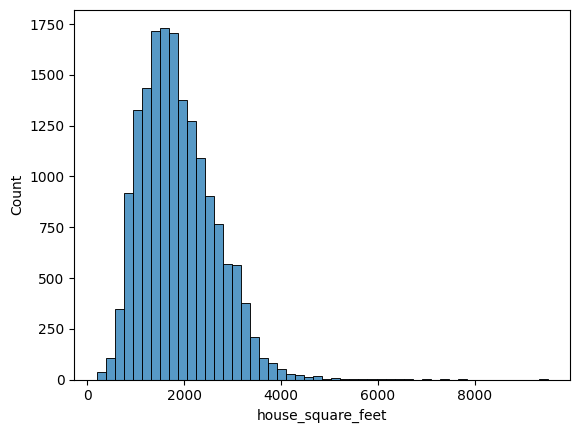

In [467]:
# the new min is 200, which also seems low but isn't impossible so I want to look at the distribution
sns.histplot(data=hp, x=var, bins=50)
# looks like a fairly normal distribution, but with a long right tail


<Axes: xlabel='house_square_feet'>

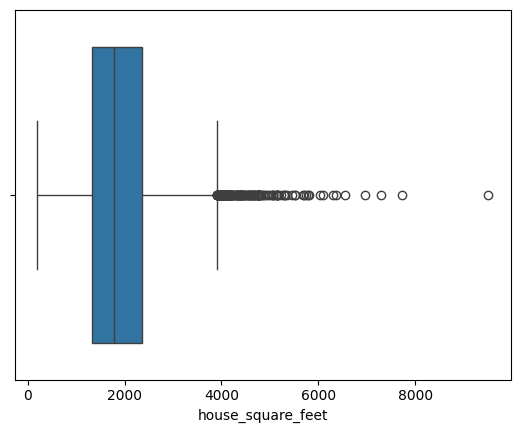

In [468]:
sns.boxplot(data=hp, x=var)
# there are quite a few outliers - the second whisker is at approximately 4000 sq ft, and the max is over twice that


<Axes: xlabel='log_sqft', ylabel='Count'>

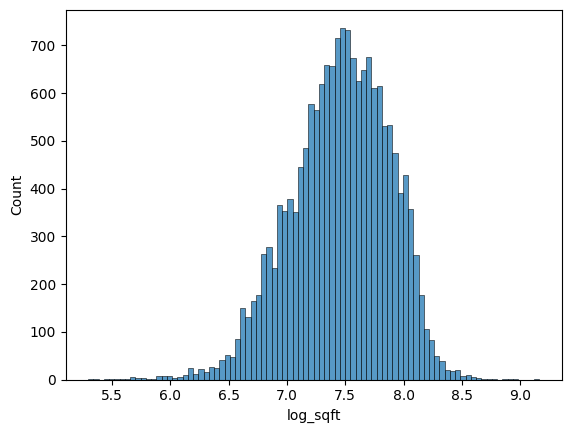

In [469]:
# for this one, I want to use it in my regression but I also don't want to include the huge houses in the model
# so I'm going to use a log transformation to reduce the impact of the right skew
hp['log_sqft'] = np.log(hp['house_square_feet'])
sns.histplot(data=hp, x='log_sqft')
# this looks much better - now it looks like a fairly normal distribution

<Axes: xlabel='log_sqft', ylabel='sale_price'>

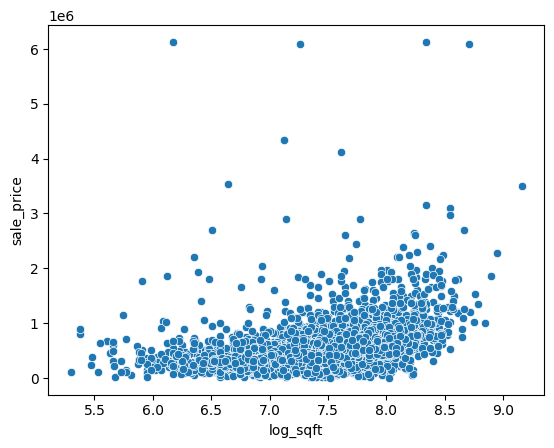

In [470]:
# let's look at the correlation with sale price
var = 'log_sqft'
sns.scatterplot(data=hp, x=var, y='sale_price')

<Axes: xlabel='log_sqft', ylabel='Density'>

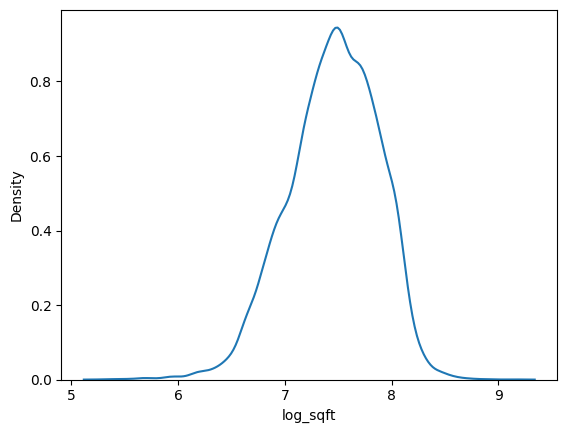

In [471]:
sns.kdeplot(data=hp, x=var)

In [472]:
extra_space = ['attic_finished_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet']
hp[extra_space].describe()

,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet
count,16813.000000,16813.000000,16813.000000,16813.000000
mean,24.947362,167.840005,364.420627,38.300779
std,102.069271,429.075355,286.461944,164.696104
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,420.000000,0.000000
75%,0.000000,0.000000,528.000000,0.000000
max,1212.000000,4000.000000,2816.000000,3664.000000


In [473]:
hp['fireplaces'].describe()

count    16813.000000
mean         0.889074
std          0.596710
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: fireplaces, dtype: float64

In [474]:
# the columns with missing values (from data wrangler view) are hvac_description, exterior, interior, and roof_cover
# each column is missing <1% of the data, so I'm going to drop those rows
hp.drop(hp[hp['hvac_description'].isna()].index, inplace=True)
hp.drop(hp[hp['exterior'].isna()].index, inplace=True)
hp.drop(hp[hp['interior'].isna()].index, inplace=True)
hp.drop(hp[hp['roof_cover'].isna()].index, inplace=True)


In [475]:
var = 'hvac_description'
hp[var].value_counts()

hvac_description
Forced Air                10379
Electric Baseboard         2664
Heat Pump                  2082
Warm and Cool Air Zone     1268
Floor/Wall Furnace          174
Hot Water Baseboard         146
No Heat                      80
Electric                      2
Floor Wall Furnace            1
Name: count, dtype: int64

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/2802662798.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp, x='sale_price', hue = var)


<Axes: xlabel='sale_price', ylabel='Density'>

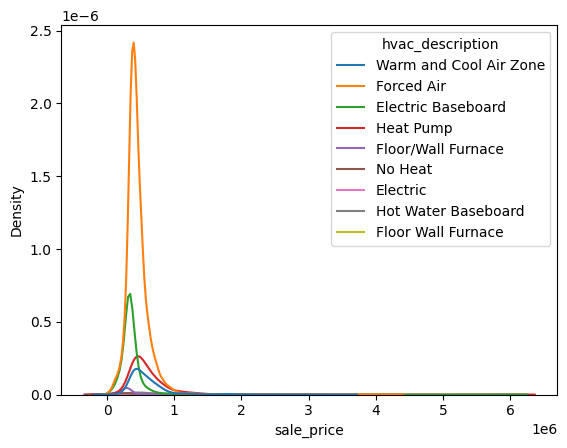

In [476]:
sns.kdeplot(data=hp, x='sale_price', hue = var)

In [477]:
hp.describe()
hp.isna().sum()

sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   0
exterior                           0
interior                           0
stories                            0
roof_cover                         0
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16245
view_quality                   15879
utility_sewer                      0
log_sqft                           0
dtype: int64

<Axes: xlabel='stories', ylabel='sale_price'>

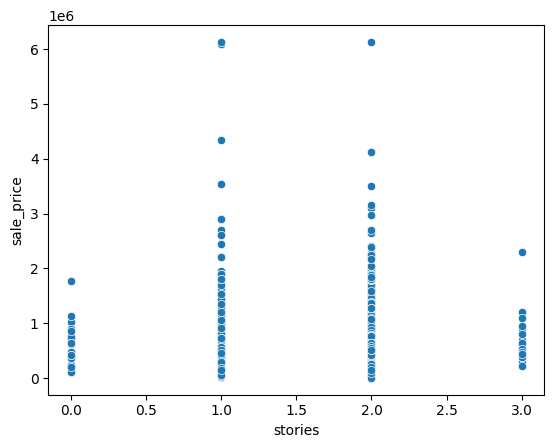

In [478]:
var = 'stories'
sns.scatterplot(data=hp, x=var, y='sale_price')

<Axes: xlabel='stories', ylabel='sale_price'>

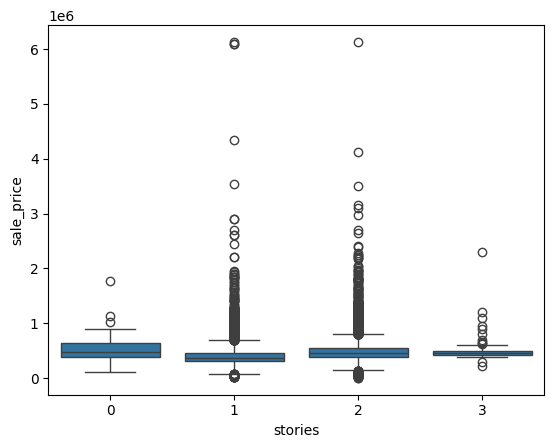

In [479]:
sns.boxplot(data=hp, x=var, y='sale_price')

In [480]:
# it's interesting that 3 story houses are cheapter than 2 story houses, and I also don't know what a 0 story house is
hp[var].value_counts()
# there aren't many 0 story houses compared to the overall dataset
# so I'm thinking this may have been a data entry error or a weird imputation for missing values
# and I'm going to drop them
hp.drop(hp[hp['stories'] == 0].index, inplace=True)

In [481]:
hp['waterfront_type'].fillna('Not_Waterfront', inplace=True)

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/870647247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hp['waterfront_type'].fillna('Not_Waterfront', inplace=True)


In [482]:
# view quality is 95% missing (from data wrangler view), so I'm not going to use it in my model 
var = 'utility_sewer'
hp[var].value_counts()

utility_sewer
SEWER/SEPTIC INSTALLED    16720
SEWER/SEPTIC NO              21
SEWER/SEPTIC AVAIL           21
SEWER AVAILABLE               3
SEWER/SEPTIC NO PERC          1
Name: count, dtype: int64

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/3240098208.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp[hp[var]!='SEWER/SEPTIC INSTALLED'], x='sale_price', hue = var)


<Axes: xlabel='sale_price', ylabel='Density'>

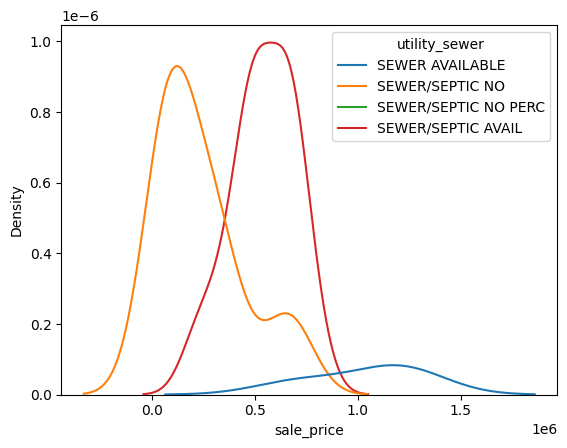

In [483]:
# this one doesn't seem to be very useful either - even though there's no missing data, >99% of the houses have sewer/septic installed
# i'm also assuming that avail and available are the same thing, and it's unclear what no perc means
# i want to check the distribution of sale prices by this variable before deciding to drop it
sns.kdeplot(data=hp[hp[var]!='SEWER/SEPTIC INSTALLED'], x='sale_price', hue = var)

<Axes: xlabel='sale_price', ylabel='Density'>

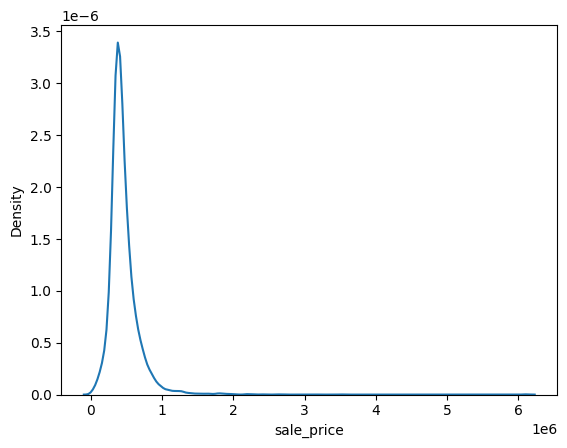

In [484]:
sns.kdeplot(data=hp, x='sale_price')

<Axes: xlabel='log_sale_price', ylabel='Density'>

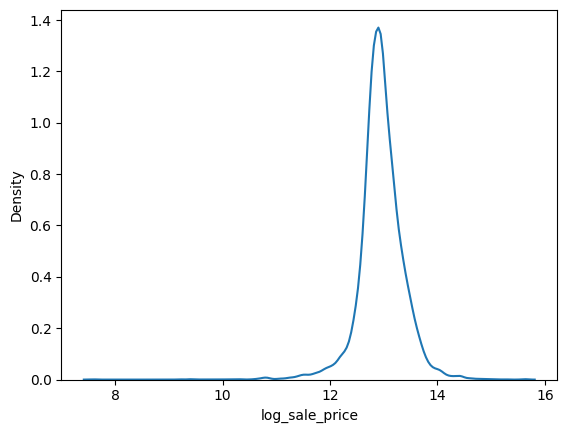

In [485]:
# also, it's clear from all the other plots that sale_price (the target variable) is not normally distributed and is extremely right skewed
# so I'm going to log transform it as well
hp['log_sale_price'] = np.log(hp['sale_price'])
sns.kdeplot(data=hp, x='log_sale_price')
# i'm going to keep this variable, but I want to see how a model does with the original and with the log transformed version

In [486]:
# now I want to get dummies from the categorical variables (that I'm using in the model)
cat = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type']
dummies = pd.get_dummies(hp[cat], drop_first=True)

In [487]:
dummies.head()

,hvac_description_Electric Baseboard,hvac_description_Floor Wall Furnace,hvac_description_Floor/Wall Furnace,hvac_description_Forced Air,hvac_description_Heat Pump,hvac_description_Hot Water Baseboard,hvac_description_No Heat,hvac_description_Warm and Cool Air Zone,exterior_Cedar Finished Cabin,exterior_Cedar Unfinished Cabin,...,interior_Paneling,roof_cover_Composition Shingle,roof_cover_Concrete Tile,roof_cover_Formed Seam Metal,roof_cover_Preformed Metal,roof_cover_Wood Shake,waterfront_type_WF Lake,waterfront_type_WF River,waterfront_type_WF Salt,waterfront_type_WF Stream/Creek
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [488]:
# now that the data is cleaned, I want to concatenate all the variables i'm using into one dataframe
model_vars = ['log_sqft', 'fireplaces', 'stories', 'year_built', 'bedrooms', 'bathrooms',
               'attic_finished_square_feet','basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet']
vars = hp.loc[:, model_vars]
vars.head()

,log_sqft,fireplaces,stories,year_built,bedrooms,bathrooms,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet
0,7.676474,0,2,1993,3,3,0,0,528,0
1,7.713338,0,2,2017,4,3,0,0,396,0
2,7.280697,1,1,1965,3,2,0,0,0,0
3,6.723832,0,1,1919,2,1,0,0,0,0
4,7.484369,1,1,1955,3,2,0,384,484,0


In [489]:
# I also wonder if it's more important whether the property has an attic/basement/attached garage/detached garage sqft (boolean) instead of the area
cols = ['attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet']
vars2 = vars.copy()
for col in cols:
    vars2[f'{col}_exists'] = vars2[col] != 0 
    print(vars2[f'{col}_exists'].value_counts())
    vars2.drop(col, axis=1, inplace=True)

attic_finished_square_feet_exists
False    15663
True      1103
Name: count, dtype: int64
basement_square_feet_exists
False    14057
True      2709
Name: count, dtype: int64
attached_garage_square_feet_exists
True     11596
False     5170
Name: count, dtype: int64
detached_garage_square_feet_exists
False    15690
True      1076
Name: count, dtype: int64


In [490]:
vars2.head()

,log_sqft,fireplaces,stories,year_built,bedrooms,bathrooms,attic_finished_square_feet_exists,basement_square_feet_exists,attached_garage_square_feet_exists,detached_garage_square_feet_exists
0,7.676474,0,2,1993,3,3,False,False,True,False
1,7.713338,0,2,2017,4,3,False,False,True,False
2,7.280697,1,1,1965,3,2,False,False,False,False
3,6.723832,0,1,1919,2,1,False,False,False,False
4,7.484369,1,1,1955,3,2,False,True,True,False


In [491]:
X = pd.concat([vars, dummies], axis=1)
X.head()

,log_sqft,fireplaces,stories,year_built,bedrooms,bathrooms,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,...,interior_Paneling,roof_cover_Composition Shingle,roof_cover_Concrete Tile,roof_cover_Formed Seam Metal,roof_cover_Preformed Metal,roof_cover_Wood Shake,waterfront_type_WF Lake,waterfront_type_WF River,waterfront_type_WF Salt,waterfront_type_WF Stream/Creek
0,7.676474,0,2,1993,3,3,0,0,528,0,...,False,True,False,False,False,False,False,False,False,False
1,7.713338,0,2,2017,4,3,0,0,396,0,...,False,True,False,False,False,False,False,False,False,False
2,7.280697,1,1,1965,3,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,6.723832,0,1,1919,2,1,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,7.484369,1,1,1955,3,2,0,384,484,0,...,False,True,False,False,False,False,False,False,False,False


3. Implement an ~80/~20 train-test split. Put the test data aside.

In [492]:
# 43 variables is a lot - PCA would be a good option here, but I'm just going to regress on all of them first to see how the model does
Y = hp['sale_price']

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


In [493]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def run_reg(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    lm = LinearRegression().fit(X_train, Y_train)
    print(f"R^2 train: ", lm.score(X_train, Y_train))
    print(f"R^2 test: ", lm.score(X_test, Y_test))
    print(f"RMSE train: ", np.sqrt(mean_squared_error(Y_train, lm.predict(X_train))))
    print(f"RMSE test: ", np.sqrt(mean_squared_error(Y_test, lm.predict(X_test))))
    print(f"Price Range: {Y.min()} - {Y.max()}")
    print(f"Price Mean: {Y.mean()}")

In [494]:
run_reg(X,Y) # regression on all variables for original sale_price

R^2 train:  0.5096081835224208
R^2 test:  0.4355597538604825
RMSE train:  160169.78955918268
RMSE test:  190578.14742217882
Price Range: 2000 - 6130000
Price Mean: 460741.0162233091


In [495]:
# results: not fantastic - R^2 are both ~0.5, RMSE is over $150,000, which is a lot compared to the mean of the prices but slightly less compared to range

In [496]:
lY = hp['log_sale_price'] # now I'm going to run the regression on the log transformed sale price to see if this improves the model
run_reg(X,lY) 

R^2 train:  0.4800666343990989
R^2 test:  0.430952996529396
RMSE train:  0.3052047537460445
RMSE test:  0.3273800938701375
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [497]:
# R^2 is slightly worse, but not significantly different than original price column. Still going back to the original for easier interpretation
# I want to try dropping some of the variables next, starting simple
print(X.columns)

Index(['log_sqft', 'fireplaces', 'stories', 'year_built', 'bedrooms',
       'bathrooms', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'hvac_description_Electric Baseboard',
       'hvac_description_Floor Wall Furnace',
       'hvac_description_Floor/Wall Furnace', 'hvac_description_Forced Air',
       'hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
       'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone',
       'exterior_Cedar Finished Cabin', 'exterior_Cedar Unfinished Cabin',
       'exterior_Finished Cottage', 'exterior_Frame Hardboard',
       'exterior_Frame Rustic Log', 'exterior_Frame Siding',
       'exterior_Frame Stucco', 'exterior_Frame Vinyl', 'exterior_Log',
       'exterior_Masonry Common Brick', 'exterior_Masonry Concrete Block',
       'exterior_Pine A-Frame', 'exterior_Pine Finished Cabin',
       'exterior_Pine Unfinished Cabin', 'exterior_U

In [498]:
X2 = X.loc[:,['bedrooms', 'bathrooms', 'fireplaces', 'log_sqft']] # only using a few numeric variables
run_reg(X2,lY) # regression on a few variables for log_sale_price

R^2 train:  0.35386075535725103
R^2 test:  0.323207640250331
RMSE train:  0.3402361923297501
RMSE test:  0.3570309966049586
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [499]:
# not great, and let's try original sale price again just to see
run_reg(X2,Y) # regression on a few variables for original sale_price

R^2 train:  0.2771716754636192
R^2 test:  0.23691932691312712
RMSE train:  194458.3422382604
RMSE test:  221589.58375884994
Price Range: 2000 - 6130000
Price Mean: 460741.0162233091


In [500]:
# this one did even worse, so I'll go back to log price and add back a few more numeric variables first
X3 = X.loc[:,['bedrooms', 'bathrooms', 'fireplaces', 'log_sqft', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet']]
run_reg(X3,lY) # regression on a few more variables for log_sale_price
# this one did a bit better, but not significantly

R^2 train:  0.41977998207880296
R^2 test:  0.3880585945209829
RMSE train:  0.32241393467961793
RMSE test:  0.3394947935148682
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [501]:
# now I want to try adding back some of the categorical variables, one at a time to assess their impact on the model
X4 = X.loc[:,['bedrooms', 'bathrooms', 'fireplaces', 'log_sqft', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet', 'waterfront_type_WF Lake', 'waterfront_type_WF River',
       'waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek']]
run_reg(X4,lY) 

R^2 train:  0.45782167972854226
R^2 test:  0.43141780320254774
RMSE train:  0.3116653514744409
RMSE test:  0.32724636191349615
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [502]:
# getting a little better, but still not great
# going to add back hvac_description
X5 = X.loc[:,['bedrooms', 'bathrooms', 'fireplaces', 'log_sqft', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet', 'waterfront_type_WF Lake', 'waterfront_type_WF River',
       'waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek', 'hvac_description_Electric Baseboard',
       'hvac_description_Floor Wall Furnace','hvac_description_Floor/Wall Furnace', 'hvac_description_Forced Air',
       'hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
       'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone']]
run_reg(X5,lY)

R^2 train:  0.4658182710417649
R^2 test:  0.4371790236017804
RMSE train:  0.3093584366277348
RMSE test:  0.32558421119422937
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [503]:
# getting marginally better
# going to add back stories, even tho it had a strange relationship with price
X6 = X.loc[:,['bedrooms', 'bathrooms', 'fireplaces', 'log_sqft', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet', 'waterfront_type_WF Lake', 'waterfront_type_WF River',
       'waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek', 'hvac_description_Electric Baseboard',
       'hvac_description_Floor Wall Furnace','hvac_description_Floor/Wall Furnace', 'hvac_description_Forced Air',
       'hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
       'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone','stories']]
run_reg(X6,lY)

R^2 train:  0.46851224270537406
R^2 test:  0.43912158188788175
RMSE train:  0.3085773763406778
RMSE test:  0.3250218538800276
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [504]:
# extremely marginal improvement, so I'll remove it again
# we're almost back at the R^2s for the full variable list, which was still only ~0.5
# let's try without bathrooms, because I have a feeling that is highly correlated with bedrooms
X7 = X.loc[:,['bedrooms', 'fireplaces', 'log_sqft', 'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet', 'waterfront_type_WF Lake', 'waterfront_type_WF River',
       'waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek', 'hvac_description_Electric Baseboard',
       'hvac_description_Floor Wall Furnace','hvac_description_Floor/Wall Furnace', 'hvac_description_Forced Air',
       'hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
       'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone']]
run_reg(X7,lY)

R^2 train:  0.4638094714747034
R^2 test:  0.4354301255299404
RMSE train:  0.30993956466220846
RMSE test:  0.3260896755985541
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [505]:
X8 = pd.concat([vars2, dummies], axis=1)
X8 = X8.loc[:,['bedrooms', 'fireplaces', 'log_sqft', 'waterfront_type_WF Lake', 'waterfront_type_WF River',
       'waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek', 'hvac_description_Electric Baseboard',
       'hvac_description_Floor Wall Furnace','hvac_description_Floor/Wall Furnace', 'hvac_description_Forced Air',
       'hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
       'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone', 'attic_finished_square_feet_exists', 'basement_square_feet_exists',
       'attached_garage_square_feet_exists', 'detached_garage_square_feet_exists']]
run_reg(X8,lY)

R^2 train:  0.44542752825592247
R^2 test:  0.4270225630545821
RMSE train:  0.3152075443572045
RMSE test:  0.3285087628639341
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [506]:
# I guess square footage is a better predictor of price than the existence of an attic/basement/garage
# the best model so far is the one with all the variables, but only marginally. I'm going to try one more run to reduce the number of variables
X9 = X.loc[:,['log_sqft', 'fireplaces', 'bedrooms', # num vars
               'attic_finished_square_feet', 'basement_square_feet','attached_garage_square_feet', 'detached_garage_square_feet', # extra space
               'hvac_description_Electric Baseboard','hvac_description_Floor Wall Furnace','hvac_description_Floor/Wall Furnace', 
               'hvac_description_Forced Air','hvac_description_Heat Pump', 'hvac_description_Hot Water Baseboard',
               'hvac_description_No Heat', 'hvac_description_Warm and Cool Air Zone', # hvac
               'exterior_Cedar Finished Cabin', 'exterior_Cedar Unfinished Cabin','exterior_Finished Cottage', 'exterior_Frame Hardboard',
               'exterior_Frame Rustic Log', 'exterior_Frame Siding','exterior_Frame Stucco', 'exterior_Frame Vinyl', 'exterior_Log',
               'exterior_Masonry Common Brick', 'exterior_Masonry Concrete Block','exterior_Pine A-Frame', 
               'exterior_Pine Finished Cabin','exterior_Pine Unfinished Cabin', 'exterior_Unfinished Cottage', # exterior
               'waterfront_type_WF Lake', 'waterfront_type_WF River','waterfront_type_WF Salt', 'waterfront_type_WF Stream/Creek']] # waterfront
run_reg(X9,lY)

R^2 train:  0.4746006941019566
R^2 test:  0.42686070880686944
RMSE train:  0.30680483323312663
RMSE test:  0.3285551580453921
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952073616236317


In [507]:
# this is still a lot of variables 
# (bedrooms, fireplaces, log_sqft, extra space sqft, hvac description, exterior, waterfront type)
# and it still explains less than half of the variance
# but it isn't too far from the original with all the variables so I'll choose X9 as the best model and move on to the next step

5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 


In [508]:
def part_resid(v):
    x_k = X[v]
    X_mk = X.drop(v,axis=1)

    ## 1. Regress y on x\k, save residual r_y
    reg_y = LinearRegression(fit_intercept=False).fit(X_mk, lY) # Fit the linear model
    r_y = lY - reg_y.predict(X_mk)

    ## 2. Regress x_k on x\k, save residual r_x
    reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
    r_x = x_k - reg_k.predict(X_mk)
    ## 3. Plot r_y against r_k
    reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
    print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
    sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')

Partial R^2:  0.10669755397669123


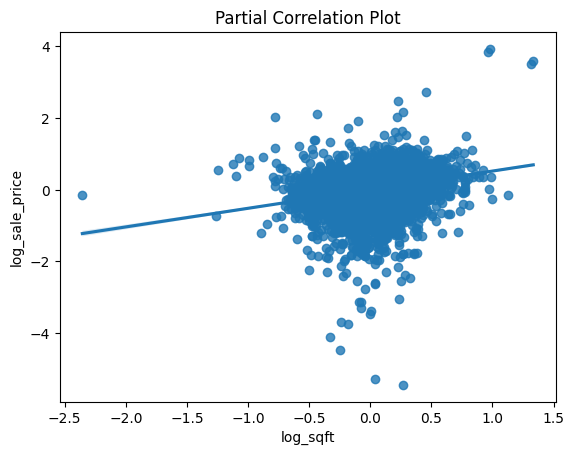

In [509]:
part_resid('log_sqft')

Partial R^2:  0.0017561727304667984


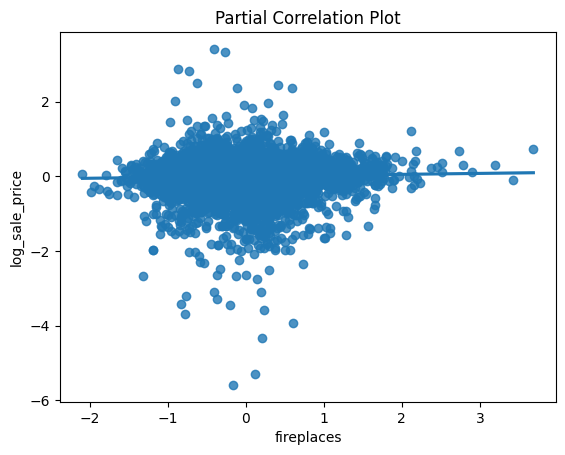

In [510]:
part_resid('fireplaces')

Partial R^2:  0.006477167092323266


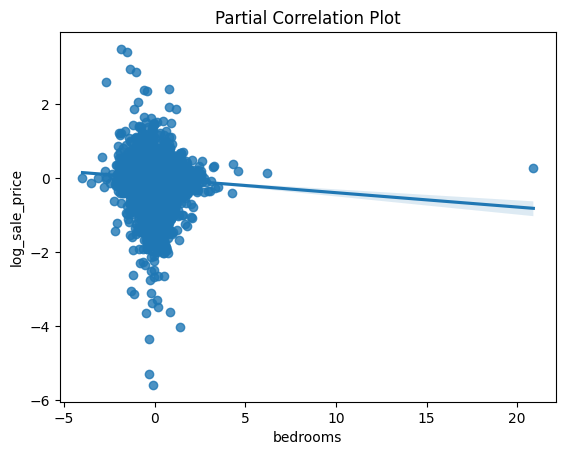

In [511]:
part_resid('bedrooms')

Partial R^2:  0.009238090721964354


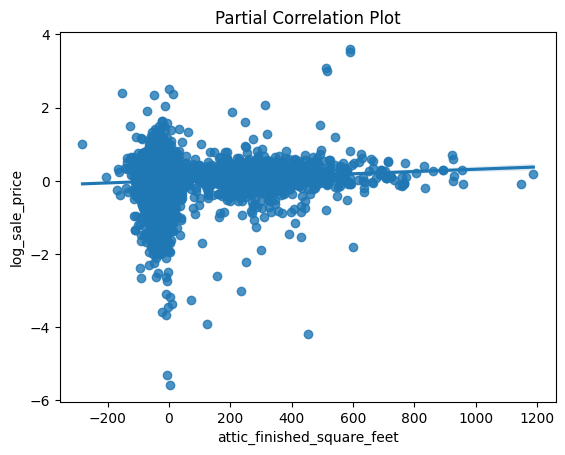

In [512]:
part_resid('attic_finished_square_feet')

Partial R^2:  0.058940514346397244


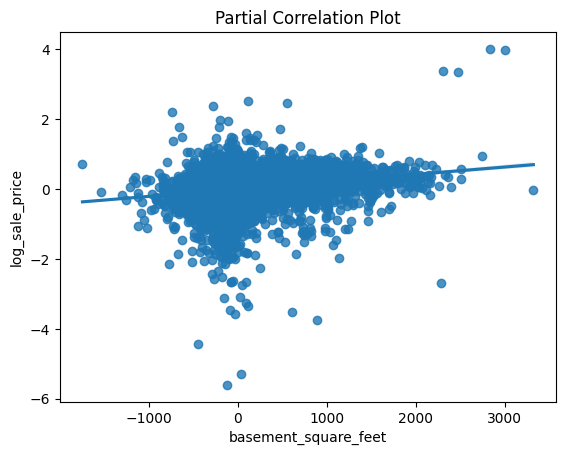

In [513]:
part_resid('basement_square_feet')

Partial R^2:  0.0041274232159449475


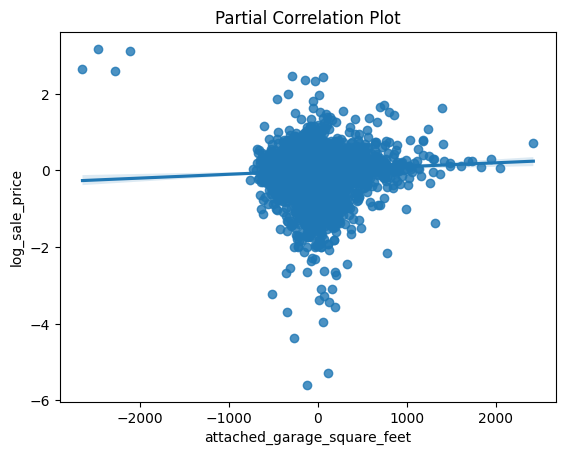

In [514]:
part_resid('attached_garage_square_feet')

Partial R^2:  0.0030456230553360664


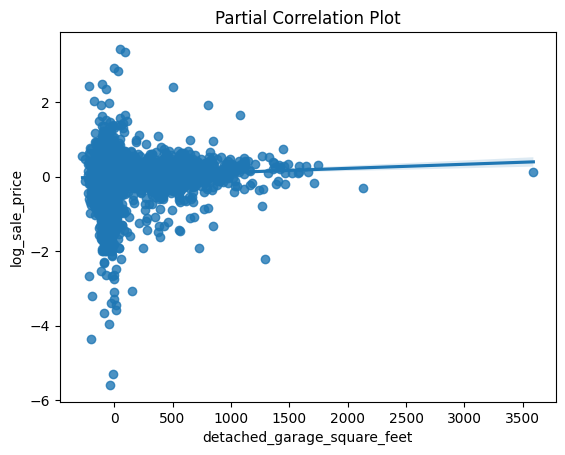

In [515]:
part_resid('detached_garage_square_feet')

In [516]:
#...none of them are that linear, but some are worse than others
# log_sqft, bedrooms, attached_garage_square_feet, and detached_garage_square_feet are the least linear looking, 
# especially because of large clusters in the data

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [517]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X9.iloc[:,0:7]) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
print(names)
ex = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
ex

['log_sqft' 'fireplaces' 'bedrooms' 'attic_finished_square_feet'
 'basement_square_feet' 'attached_garage_square_feet'
 'detached_garage_square_feet' 'log_sqft^2' 'log_sqft fireplaces'
 'log_sqft bedrooms' 'log_sqft attic_finished_square_feet'
 'log_sqft basement_square_feet' 'log_sqft attached_garage_square_feet'
 'log_sqft detached_garage_square_feet' 'fireplaces^2'
 'fireplaces bedrooms' 'fireplaces attic_finished_square_feet'
 'fireplaces basement_square_feet'
 'fireplaces attached_garage_square_feet'
 'fireplaces detached_garage_square_feet' 'bedrooms^2'
 'bedrooms attic_finished_square_feet' 'bedrooms basement_square_feet'
 'bedrooms attached_garage_square_feet'
 'bedrooms detached_garage_square_feet' 'attic_finished_square_feet^2'
 'attic_finished_square_feet basement_square_feet'
 'attic_finished_square_feet attached_garage_square_feet'
 'attic_finished_square_feet detached_garage_square_feet'
 'basement_square_feet^2'
 'basement_square_feet attached_garage_square_feet'
 'basem

In [524]:
# Align indices between ex/X9 and lY - I was having errors that I couldn't figure out how to fix so this solution is from chat
common_index = ex.index.intersection(X9.index).intersection(lY.index)
ex = ex.loc[common_index]
X9 = X9.loc[common_index]
lY = lY.loc[common_index]

# Now concatenate
X10 = pd.concat([
    ex.loc[:, ['log_sqft', 'fireplaces', 'bedrooms', 'log_sqft^2', 'log_sqft fireplaces',
               'log_sqft bedrooms', 'log_sqft attic_finished_square_feet', 
               'log_sqft basement_square_feet', 'fireplaces bedrooms']],
    X9.iloc[:, 7:]
], axis=1)

# Verify shapes match
assert X10.shape[0] == lY.shape[0], "X and y have different row counts"

# Run regression
run_reg(X10, lY)

R^2 train:  0.23055830770075558
R^2 test:  0.1722118651884248
RMSE train:  0.36772760049048125
RMSE test:  0.3951772305830671
Price Range: 7.600902459542082 - 15.628705307912394
Price Mean: 12.952982473332845


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


Honestly, I learned that it's easy to both over and underfit models since none of my models performed much better than my first try even after hours of testing. I think using Lasso or some sort of metric of performance would be extremely useful, since most of my testing and refitting felt more like educated guesses, and I wanted something more standardized. I also think that model selection is limited by the variables available in the dataset—especially with something like housing prices, I'm curious how the "best" linear model from this dataset performs. I consider an R^2 of .5 to be not great, since the model is only explaining 50% of the variance, but I would expect housing prices to be affected significantly by factors not included in the data, primarily spatial variables like neighborhood, good school zones, yard size, etc. Additionally, as we discussed in class recently, I think PCA would've been useful here for building a better model since it seemed like a lot of the variables would be highly correlated since they were basically just describing the size of the house - bigger houses by total area would tend to have more bathrooms, more bedrooms, even more fireplaces, etc.

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.